# Creating CNN Using Scratch and Transfer Learning

In [84]:
# import the below liabraries
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [85]:
# re-size all the images
IMAGE_SIZE=[224,224]

train_path='C:/Users/Lenovo/Desktop/Project/Malaria Disease detection using Deep Learning/Dataset/Train.csv'
valid_path='C:/Users/Lenovo/Desktop/Project/Malaria Disease detection using Deep Learning/Dataset/Test.csv'

In [86]:
#here we will add vgg19 liabrary and add the preprocessing layer in the front of VGG.
#We are using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [87]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [88]:
# useful for getting the number of output classes
folders = glob('C:/Users/Lenovo/Desktop/Project/Malaria Disease detection using Deep Learning/Dataset/Train/*')

In [89]:
folders

['C:/Users/Lenovo/Desktop/Project/Malaria Disease detection using Deep Learning/Dataset/Train\\Parasite',
 'C:/Users/Lenovo/Desktop/Project/Malaria Disease detection using Deep Learning/Dataset/Train\\Uninfected']

In [90]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [91]:
prediction = Dense(len(folders), activation='softmax')(x)

# create the model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [92]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [93]:
from tensorflow.keras.layers import MaxPooling2D

In [94]:
# create the model from scratch using CNN
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)            

In [95]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [96]:
# Use the Image Data Generator to import the images from the Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [97]:
# Make sure you should provide the same target size as initailized for image size
training_set = train_datagen.flow_from_directory('C:/Users/Lenovo/Desktop/Project/Malaria Disease detection using Deep Learning/Dataset/Train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [98]:
training_set

In [99]:
test_set = test_datagen.flow_from_directory('C:/Users/Lenovo/Desktop/Project/Malaria Disease detection using Deep Learning/Dataset/Test',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [100]:
test_set

In [101]:
# fit the model
# Run each cell, it will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 27s 2s/step - loss: 1.2443 - accuracy: 0.4880 - val_loss: 0.8151 - val_accuracy: 0.3284
Epoch 2/50
13/13 [==============================] - 17s 1s/step - loss: 0.6906 - accuracy: 0.5288 - val_loss: 0.6681 - val_accuracy: 0.6716
Epoch 3/50
13/13 [==============================] - 19s 1s/step - loss: 0.6717 - accuracy: 0.5913 - val_loss: 0.6734 - val_accuracy: 0.6716
Epoch 4/50
13/13 [==============================] - 19s 1s/step - loss: 0.6469 - accuracy: 0.5938 - val_loss: 0.7144 - val_accuracy: 0.3806
Epoch 5/50
13/13 [==============================] - 20s 2s/step - loss: 0.5764 - accuracy: 0.6875 - val_loss: 0.8051 - val_accuracy: 0.4030
Epoch 6/50
13/13 [==============================] - 19s 1s/step - loss: 0.5619 - accuracy: 0.6803 - val_loss: 1.0480 - val_accuracy: 0.3657
Epoch 7/50
13/13 [==============================] - 18s 1s/step - loss: 0.6337 - accuracy: 0.6514 - val_loss: 0.8964 - val_accuracy: 0.3582
Epoch 8/50
13/13 [==

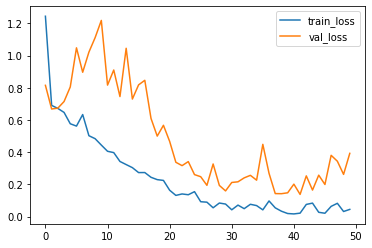

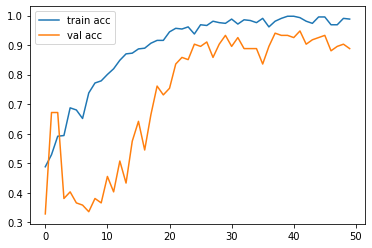

<Figure size 432x288 with 0 Axes>

In [102]:
#plot the loss
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [103]:
# save it as h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [104]:
y_pred = model.predict(test_set)

In [105]:
y_pred

array([[9.99984503e-01, 1.55249945e-05],
       [7.49498427e-01, 2.50501633e-01],
       [1.63117871e-01, 8.36882174e-01],
       [1.00000000e+00, 2.08262977e-22],
       [9.99825299e-01, 1.74675355e-04],
       [9.98684466e-01, 1.31553365e-03],
       [9.99984980e-01, 1.50256083e-05],
       [9.10198875e-03, 9.90898073e-01],
       [1.50223747e-01, 8.49776268e-01],
       [3.16333910e-03, 9.96836662e-01],
       [1.35066286e-01, 8.64933729e-01],
       [1.00000000e+00, 3.20349658e-09],
       [1.94544951e-03, 9.98054624e-01],
       [4.45412062e-02, 9.55458760e-01],
       [8.24266765e-03, 9.91757333e-01],
       [7.23056635e-03, 9.92769480e-01],
       [3.45939700e-03, 9.96540606e-01],
       [9.99999285e-01, 7.51727612e-07],
       [1.00000000e+00, 1.94915715e-14],
       [9.99868870e-01, 1.31071414e-04],
       [9.99593198e-01, 4.06793319e-04],
       [9.99399185e-01, 6.00858475e-04],
       [8.07497464e-03, 9.91925061e-01],
       [9.99096870e-01, 9.03171836e-04],
       [9.999861

In [106]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [107]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [108]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [109]:
model=load_model('model_vgg19.h5')

In [110]:
img=load_img('C:/Users/Lenovo/Desktop/Project/Malaria Disease detection using Deep Learning/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [111]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [112]:
x.shape

(224, 224, 3)

In [113]:
x=x/255

In [114]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [115]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [116]:
a = np.argmax(model.predict(img_data), axis=1)

In [117]:
if(a==1):
    print("uninfected")
else:
    print("Infected")

uninfected
